#### Tesla stock price analysis

In this notebook we analyse the Tesla Stock prices using 

1. Google searches
2. News (financial, political, ...)
3. Financial data (Stock prices, volume)
4. Reports done by the companies
5. Information about the country/ CEO/...
6. Major events like wars, pandemies,...

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt

# Library to fetch trends from Google trends
from pytrends.request import TrendReq

# Libraries to fetch news data from TheNewsAPI
import requests
import urllib.parse
from datetime import datetime, timedelta

In [ ]:
ticker = "TSLA"
start_date = "2017-01-01"
end_date = "2025-03-13"

data = yf.download(tickers = ticker, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [9]:
data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2017-01-03,14.466000,14.688667,14.064000,14.324000,88849500
2017-01-04,15.132667,15.200000,14.287333,14.316667,168202500
2017-01-05,15.116667,15.165333,14.796667,15.094667,88675500
2017-01-06,15.267333,15.354000,15.030000,15.128667,82918500
2017-01-09,15.418667,15.461333,15.200000,15.264667,59692500
...,...,...,...,...,...
2025-03-06,263.450012,272.649994,260.019989,272.059998,98451600
2025-03-07,262.670013,266.250000,250.729996,259.320007,102369600


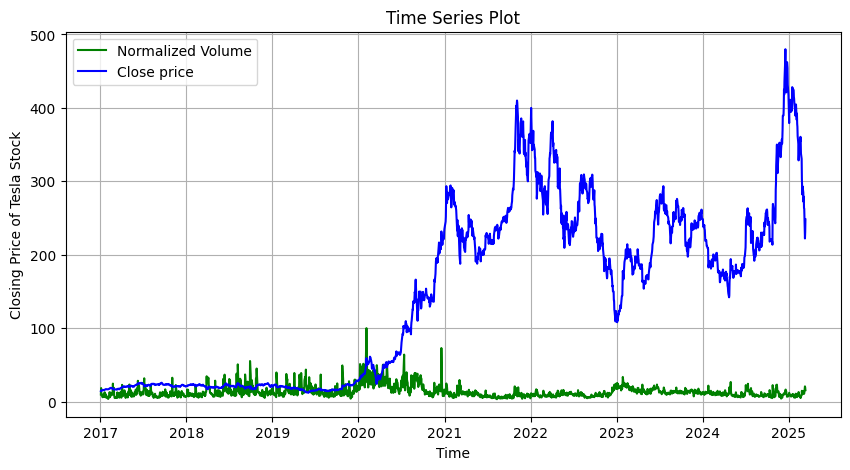

In [12]:
plt.figure(figsize=(10, 5))  
plt.plot(data.index, data['Volume']/data['Volume'].max()*100, label='Normalized Volume', color='green')
plt.plot(data.index, data['Close'], label='Close price', color='blue')

# Formatting
plt.xlabel('Time')
plt.ylabel('Closing Price of Tesla Stock')
plt.title('Time Series Plot')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
Tesla_brand_id = "Tesla stock" #"/m/07yv9"

def fetch_google_trends(topic: str, country: str, time_span: str):
    pytrends = TrendReq(hl='en-US', tz=360)
    
    # Build the search payload
    pytrends.build_payload([topic], geo=country, timeframe=time_span)
    
    # Fetch interest over time
    df = pytrends.interest_over_time()
    
    if 'isPartial' in df.columns:
        df = df.drop(columns=['isPartial'])  # Remove partial data column
    
    return df

search_df = fetch_google_trends(topic=Tesla_brand_id, country="", time_span="today 5-y")  # Last 5 years


/Users/doblerloic/Desktop/Finance_prediction_project/predictive_finance/.venv/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [ ]:
# Calculate the date one year ago
one_year_ago = (datetime.now() - timedelta(days=7)).strftime('%Y-%m-%d')

# API key and endpoint
api_key = 'P4O7YFRnooX5BcYP3NHSRjQTofd5BZuUzjskKBBZ'
url = "https://api.thenewsapi.com/v1/news/top"

# Parameters for the request
params = {
    'api_token': api_key,
    'search': 'Tesla',
    'categories': 'business',  # Filter for financial/business news
    'locale': 'us,ca,gb,de,fr,es,it,pl',  # US, Canada, UK, Germany, France, Spain, Italy, Poland (Europe + North America)
    'published_after': one_year_ago,  # Articles from the last year
    'limit': 3, 
    'language': 'en',  # English language articles
}

# URL encode parameters
url_with_params = f"{url}?{urllib.parse.urlencode(params)}"

# Make the GET request
response = requests.get(url_with_params)


In [26]:
news_data = response.json()

In [30]:
news_data["data"][0]

{'uuid': '5b8a1cf0-dc17-43d3-a4f5-8b775f620dd6',
 'title': 'Tesla Unusual Options Activity - Tesla (NASDAQ:TSLA)',
 'description': '',
 'keywords': '',
 'snippet': 'Investors with a lot of money to spend have taken a bearish stance on Tesla TSLA.\n\nAnd retail traders should know.\n\nWe noticed this today when the trades showed...',
 'url': 'https://www.benzinga.com/insights/options/25/01/43131703/tesla-unusual-options-activity',
 'image_url': 'https://cdn.benzinga.com/files/images/story/2023/movers_image_0.jpeg?width=1200&height=800&fit=crop',
 'language': 'en',
 'published_at': '2025-01-22T15:15:49.000000Z',
 'source': 'benzinga.com',
 'categories': ['business'],
 'relevance_score': 20.749239,
 'locale': 'us'}

In [29]:
print(news_data["data"][0]["snippet"])

Investors with a lot of money to spend have taken a bearish stance on Tesla TSLA.

And retail traders should know.

We noticed this today when the trades showed...


In [ ]:

# Check the response and print the data
if response.status_code == 200:
    data = response.json()
    if data['status'] == 'ok':
        for article in data['articles']:
            print(f"Title: {article['title']}")
            print(f"Source: {article['source']['name']}")
            print(f"Published at: {article['publishedAt']}")
            print(f"URL: {article['url']}\n")
    else:
        print("Error in fetching data:", data.get('message', 'Unknown error'))
else:
    print("Failed to fetch data:", response.status_code)

In [23]:
print(response.json())

{'meta': {'found': 4141, 'returned': 3, 'limit': 3, 'page': 1}, 'data': [{'uuid': '5b8a1cf0-dc17-43d3-a4f5-8b775f620dd6', 'title': 'Tesla Unusual Options Activity - Tesla (NASDAQ:TSLA)', 'description': '', 'keywords': '', 'snippet': 'Investors with a lot of money to spend have taken a bearish stance on Tesla TSLA.\n\nAnd retail traders should know.\n\nWe noticed this today when the trades showed...', 'url': 'https://www.benzinga.com/insights/options/25/01/43131703/tesla-unusual-options-activity', 'image_url': 'https://cdn.benzinga.com/files/images/story/2023/movers_image_0.jpeg?width=1200&height=800&fit=crop', 'language': 'en', 'published_at': '2025-01-22T15:15:49.000000Z', 'source': 'benzinga.com', 'categories': ['business'], 'relevance_score': 20.749239, 'locale': 'us'}, {'uuid': '4bcd295d-2a5a-4693-b9a7-3cc1ae11ff0b', 'title': 'Tesla Unusual Options Activity - Tesla (NASDAQ:TSLA)', 'description': '', 'keywords': '', 'snippet': "Deep-pocketed investors have adopted a bullish approach